In [53]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import psycopg2
import plotly.express as px


cb = "///Users/timothycummins/Downloads/cb_2017_53_bg_500k"
dbcb = gpd.read_file(cb)


DBNAME = "opportunity_youth"
conn = psycopg2.connect(dbname=DBNAME)
pumrg = pd.read_sql(f"""SELECT geo.bgrp  "GEOID",SUM(c000)  "SALL", SUM(ca01) "SU29", puma.puma5ce "PUMA", name.puma_name
                FROM wa_jobs_2017 jobs
                JOIN wa_geo_xwalk geo
                ON jobs.w_geocode = geo.tabblk2010
                JOIN ct_puma_xwalk puma
                ON geo.trct = CONCAT(puma.statefp, puma.countyfp, puma.tractce)
                JOIN puma_names_2010 name
                ON puma.puma5ce = name.puma
                WHERE puma5ce between '11610' and '11615'
                GROUP BY geo.bgrp, "PUMA",name.puma_name """, conn)

block_df = pd.merge(dbcb,pumrg,how='left',on='GEOID')
block_df['Percent'] = (block_df['SU29']/block_df['SALL']).round(2)
block_df['id'] = block_df['TRACTCE'].astype('str')+block_df['BLKGRPCE']
block_df.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,SALL,SU29,PUMA,puma_name,Percent,id
0,53,055,960100,1,1500000US530559601001,530559601001,1,BG,59109282,47703345,"MULTIPOLYGON (((-122.92278 48.75516, -122.9215...",NaN,NaN,NaN,NaN,NaN,9601001
1,53,033,029305,3,1500000US530330293053,530330293053,3,BG,901339,833,"POLYGON ((-122.21292 47.42784, -122.21290 47.4...",96.0,28.0,11613,King County (Southwest Central)--Kent City ...,0.29,0293053
2,53,033,020500,2,1500000US530330205002,530330205002,2,BG,447232,0,"POLYGON ((-122.31347 47.75749, -122.30852 47.7...",NaN,NaN,NaN,NaN,NaN,0205002
3,53,077,002802,1,1500000US530770028021,530770028021,1,BG,11072723,0,"POLYGON ((-120.67102 46.55110, -120.66386 46.5...",NaN,NaN,NaN,NaN,NaN,0028021
4,53,049,990100,0,1500000US530499901000,530499901000,0,BG,0,327305184,"POLYGON ((-124.06905 46.64726, -124.06645 46.6...",NaN,NaN,NaN,NaN,NaN,9901000


In [54]:
puma_nums = ['11610', '11611', '11612', '11613', '11614', '11615']

skc = block_df.loc[block_df['PUMA'].isin(puma_nums), ['puma_name', 'geometry','Percent','id']]

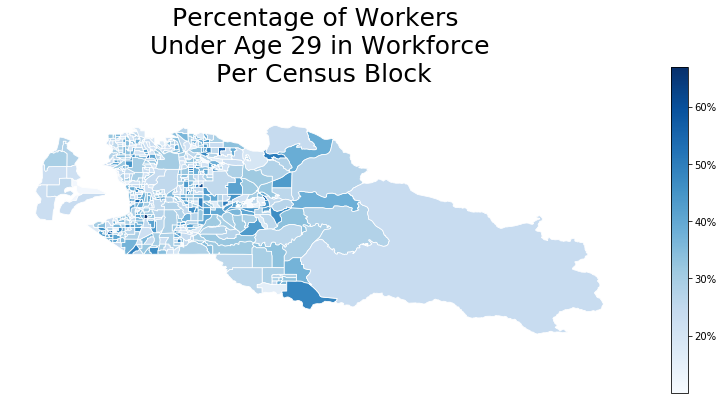

In [69]:
plt.rcParams['figure.figsize'] = [9, 6] 

vmin, vmax = .1, .67

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(14,6))

# remove the axis
ax.axis('off')

# add a title and annotation
ax.set_title('Percentage of Workers \n Under Age 29 in Workforce \n Per Census Block\n', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([])

cbar = fig.colorbar(sm)
cbar.set_ticks([.2,.3, .4, .5, .6])
cbar.set_ticklabels(['20%', '30%', '40%', '50%','60%'])
# create map
skc.plot(column=(skc['Percent']), cmap='Blues', linewidth=0.8, ax=ax, edgecolor='1')


In [48]:

ydf = block_df.sort_values(by=['Percent'], ascending=False)
hiarea = tuple(ydf['w_geocode'].head(50).values)
hiarea
pd.read_sql(f"""SELECT SUM(cns01),SUM(cns02),SUM(cns03),SUM(cns04),SUM(cns05),SUM(cns06),SUM(cns09),SUM(cns08),SUM(cns09),SUM(cns10),SUM(cns11),SUM(cns12),SUM(cns13),SUM(cns14),SUM(cns15),SUM(cns16),SUM(cns17),SUM(cns18),SUM(cns19),SUM(cns20)
                FROM wa_jobs_2017
                WHERE w_geocode in {hiarea} """, conn)


,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
0,2,0,0,30,2,0,1,3,1,1,8,1,0,6,0,11,9,6,11,0


In [ ]:
#(cns04,cns16,cns19) (Utilities,Healthcare,Other Services except Public Administration)